In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/00DAC437-FF8B-4DA3-9E24-4EE1B1AA12EC.csv


Load the data set and aggregating the accelrometer values populate into GPS X,Y and Z.

In [2]:
import pandas as pd
import numpy as np
Jounery = pd.read_csv("../input/00DAC437-FF8B-4DA3-9E24-4EE1B1AA12EC.csv")


df = pd.DataFrame()
for i in np.arange(len(Jounery)):
    avg_x_value = np.mean(Jounery.iloc[i+1:i+11,8])
    avg_y_value = np.mean(Jounery.iloc[i+1:i+11,9])
    avg_z_value = np.mean(Jounery.iloc[i+1:i+11,10])
    Jounery.iloc[i,8] = avg_x_value
    Jounery.iloc[i,9] = avg_y_value
    Jounery.iloc[i,10] = avg_z_value
    i= 1+10
    
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


                timestamp  type        lat        lon      height  accuracy  \
0  2015-06-20 22:17:56.097  gps  44.777570 -85.383821  230.885410       5.0   
10 2015-06-20 22:17:56.992  gps  44.777445 -85.383826  231.076389       5.0   
21 2015-06-20 22:17:57.976  gps  44.777314 -85.383830  231.120762       5.0   
33 2015-06-20 22:17:59.024  gps  44.777182 -85.383824  230.848362       5.0   
44 2015-06-20 22:18:00.031  gps  44.777056 -85.383821  230.614902       5.0   

    speed     bearing         x         y         z  
0   14.73  179.648438 -0.440716 -0.504561 -0.660870  
10  14.22  180.000000 -0.455887 -0.549890 -0.670583  
21  14.14  179.296875 -0.448380 -0.537086 -0.675620  
33  14.33  179.296875 -0.464896 -0.562999 -0.668083  
44  14.32  179.296875 -0.469731 -0.568634 -0.662039  


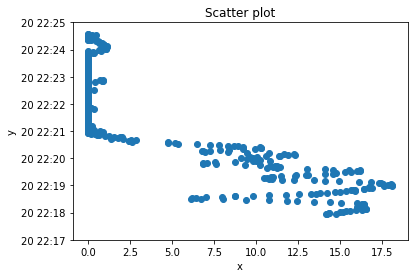

In [3]:
# Jounery.iloc[0,8]

df = Jounery[Jounery['type']=='gps']

# print(df[df['speed']==0 and df['x']==0.0])

# df[' timestamp '] = pd.to_datetime(df[' timestamp ']).apply(lambda x: pd.datetime.fromtimestamp(x).date())
df[' timestamp '] = pd.to_datetime(df[' timestamp '], unit='ms')

print(df.head(5))
# print(pd.to_datetime(1434838676097, unit='ms'))

import matplotlib.pyplot as plt

plt.scatter(df['speed'], df[' timestamp '])
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim("2015-06-20 22:17", "2015-06-20 22:25")
plt.show()

As per Above visulization few observations has the speed is zero that I am consider as accident vlaues.

In [4]:
accidents = df[df['speed']==0]
print(accidents.head(5))
print('Total number of incidents consider as accidents are',accidents.size)

                  timestamp  type       lat        lon      height  accuracy  \
1985 2015-06-20 22:20:55.023  gps  44.77536 -85.374324  204.701060       5.0   
1997 2015-06-20 22:20:56.036  gps  44.77536 -85.374324  204.625637       5.0   
2007 2015-06-20 22:20:56.991  gps  44.77536 -85.374324  204.672164       5.0   
2018 2015-06-20 22:20:57.992  gps  44.77536 -85.374324  204.807372       5.0   
2052 2015-06-20 22:21:01.014  gps  44.77537 -85.374337  204.440888       5.0   

      speed     bearing         x         y         z  
1985    0.0  227.109375 -0.464824 -0.728851 -0.484238  
1997    0.0  226.757812 -0.351261 -0.845961  0.207426  
2007    0.0  226.757812 -0.405122 -0.885947  0.130742  
2018    0.0  226.757812 -0.406964 -0.733585 -0.200836  
2052    0.0  226.757812 -0.717419 -0.623479 -0.163176  
Total number of incidents consider as accidents are 1892


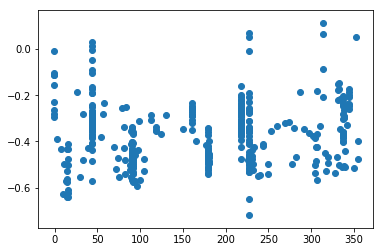

In [5]:
plt.scatter(df['bearing'], df['x'])

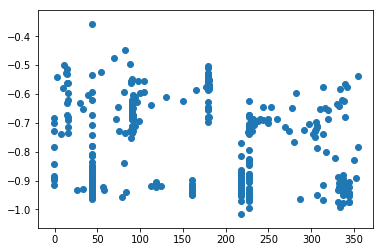

In [6]:
plt.scatter(df['bearing'], df['y'])

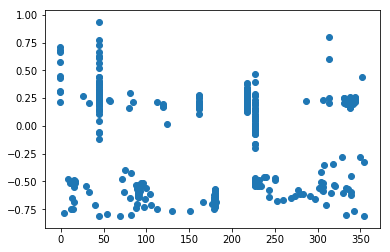

In [7]:
plt.scatter(df['bearing'], df['z'])